# 5 Minutes Quick Start from Featuretools

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import featuretools as ft

## Load Mock Data

In [2]:
data = ft.demo.load_mock_customer()

## Prepare Data

In [3]:
customers_df = data["customers"]
sessions_df = data["sessions"]
transactions_df = data["transactions"]

In [4]:
print(customers_df.shape)
customers_df

(5, 4)


,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [5]:
print(sessions_df.shape)
sessions_df.sample(5)

(35, 4)


,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [6]:
print(transactions_df.shape)
transactions_df.sample(5)

(500, 5)


,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [7]:
dataframes = {
    "customers": (customers_df, "customer_id"),
    "sessions": (sessions_df, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

relationships = [
    ("customers", "customer_id", "sessions", "customer_id"), # 1 customer has many sessions
    ("sessions", "session_id", "transactions", "session_id"), # 1 session has many transactions
]

## Run Deep Feature Synthesis

In [12]:
feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",
)
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


### Change target DataFrame

In [15]:
feature_matrix_sessions, features_defs = ft.dfs(
    dataframes=dataframes, relationships=relationships, target_dataframe_name="sessions"
)
feature_matrix_sessions.head(5)

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(birthday),customers.DAY(join_date),customers.MONTH(birthday),customers.MONTH(join_date),customers.WEEKDAY(birthday),customers.WEEKDAY(join_date),customers.YEAR(birthday),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


### Understanding feature output

In [16]:
feature = features_defs[18]
feature

<Feature: MODE(transactions.WEEKDAY(transaction_time))>

#### Feature lineage graphs

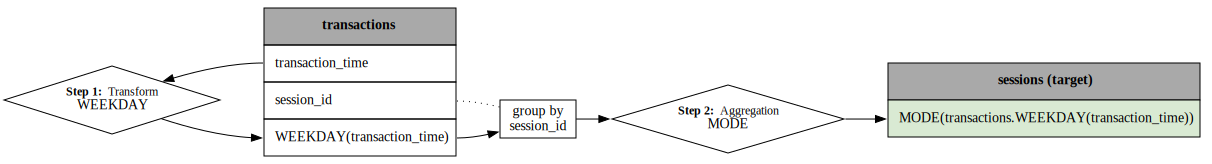

In [18]:
ft.graph_feature(feature)

In [19]:
ft.describe_feature(feature)

'The most frequently occurring value of the day of the week of the "transaction_time" of all instances of "transactions" for each "session_id" in "sessions".'